# RGB to Grayscale 
## To convert an RGB image to Grayscale using Parallel code

### Before getting started, download this [this](https://homepages.cae.wisc.edu/~ece533/images/tulips.png) image and upload it to colab.

In [1]:
using Pkg
Pkg.add("CuArrays")
Pkg.add("CUDAnative")
Pkg.add("CUDAdrv")
Pkg.add("StaticArrays")
Pkg.add("BenchmarkTools")
Pkg.add("Test")

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
  [be33ccc6] + CUDAnative v2.2.0
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
  [c5f51814] + CUDAdrv v3.0.1
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
  [90137ffa] + StaticArrays v0.11.0
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]
 Resolving package versions...
 Installed BenchmarkTools ─ v0.4.2
  Updating `~/.julia/environments/v1.0/Project.toml`
  [6e4b80f9] + BenchmarkTools v0.4.2
 

In [0]:
using CUDAnative, CUDAdrv, CuArrays, StaticArrays, BenchmarkTools, Test

In [3]:
import Pkg
Pkg.add("Images")
Pkg.add("TestImages")
Pkg.add("Colors")
Pkg.add("FileIO")
Pkg.add("ImageMagick")

 Resolving package versions...
 Installed TiledIteration ──────────── v0.2.3
 Installed PaddedViews ─────────────── v0.4.2
 Installed ImageDistances ──────────── v0.2.4
 Installed IterTools ───────────────── v1.2.0
 Installed CoordinateTransformations ─ v0.5.0
 Installed Images ──────────────────── v0.18.0
 Installed ImageMorphology ─────────── v0.2.4
 Installed Colors ──────────────────── v0.9.5
 Installed Ratios ──────────────────── v0.3.1
 Installed FixedPointNumbers ───────── v0.6.1
 Installed AxisAlgorithms ──────────── v1.0.0
 Installed ImageMetadata ───────────── v0.7.1
 Installed RangeArrays ─────────────── v0.3.1
 Installed ImageTransformations ────── v0.8.0
 Installed FileIO ──────────────────── v1.0.7
 Installed ComputationalResources ──── v0.3.0
 Installed URIParser ───────────────── v0.4.0
 Installed CatIndices ──────────────── v0.2.0
 Installed SimpleTraits ────────────── v0.8.0
 Installed IndirectArrays ──────────── v0.5.0
 Installed Graphics ────────────────── v0.4.0
 I

In [4]:
using Images, Colors, FileIO, Test

┌ Info: Precompiling Images [916415d5-f1e6-5110-898d-aaa5f9f070e0]
└ @ Base loading.jl:1186


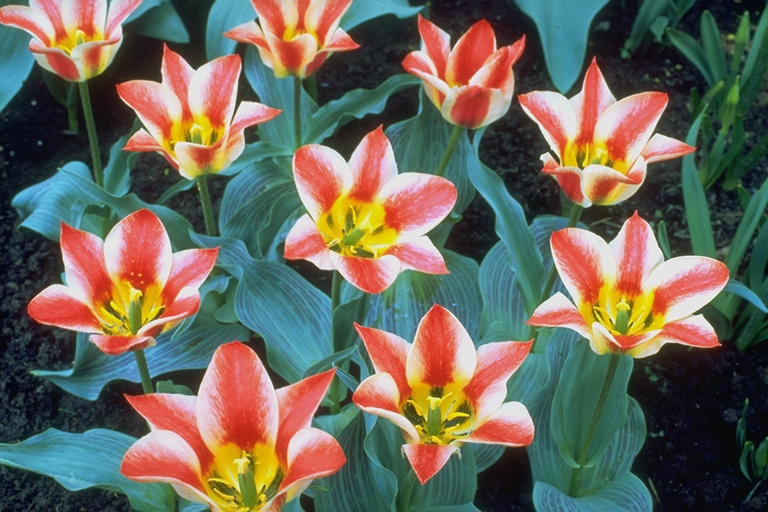

In [18]:
# Upload image
# Will be gone in 12 hrs. Must be reuploaded 
Img = load("/content/Tulips.png")

In [19]:
# Details regarding image
summary(Img)

"512×768 Array{RGB{N0f8},2} with eltype RGB{Normed{UInt8,8}}"

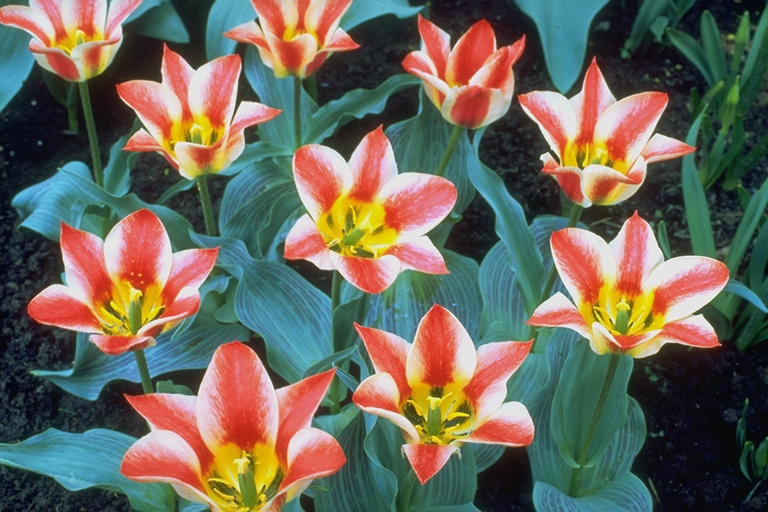

In [20]:
# Converting to RGB{Float32} datatype
RGB_image = convert(Array{RGB{Float32},2},Img)

In [21]:
const height = size(RGB_image,1)
const breadth = size(RGB_image,2)

768

In [22]:
function RGB_to_Gray(d_output,d_red,d_green,d_blue)
  idx = (blockIdx().x - 1) * blockDim().x + threadIdx().x
  idy = (blockIdx().y - 1) * blockDim().y + threadIdx().y
  
  # Bounds check
  if(idx <= height && idy <= breadth)
    d_output[idx,idy] = 0.299 * d_red[idx,idy] + 0.587 * d_green[idx,idy] + 0.114 * d_blue[idx,idy]
  end
  
  return nothing
end

RGB_to_Gray (generic function with 1 method)

In [23]:
FltGray_image = rand(Float32,height,breadth)

512×768 Array{Float32,2}:
 0.216987   0.112893   0.48491    …  0.780213   0.319093   0.828991 
 0.214262   0.932938   0.314901      0.63198    0.565208   0.709406 
 0.316698   0.950979   0.824336      0.138892   0.881577   0.407189 
 0.0948633  0.229994   0.772892      0.973849   0.176541   0.666957 
 0.444721   0.305201   0.364108      0.238557   0.352711   0.562107 
 0.344755   0.290283   0.677744   …  0.280286   0.517981   0.826194 
 0.054776   0.270075   0.664022      0.472795   0.27612    0.321836 
 0.503642   0.738301   0.399471      0.971606   0.588508   0.668741 
 0.323559   0.573993   0.535548      0.21705    0.922688   0.895937 
 0.538749   0.533146   0.399545      0.357378   0.0973843  0.206191 
 0.100454   0.228554   0.250413   …  0.257402   0.238219   0.950392 
 0.309696   0.788441   0.796951      0.265163   0.0366977  0.106096 
 0.705082   0.60294    0.0467626     0.644464   0.29739    0.811834 
 ⋮                                ⋱  ⋮                              
 0.17195

In [24]:
# Channelized view of RGB image
ChannelRGB_image = channelview(RGB_image)

3×512×768 reinterpret(Float32, ::Array{RGB{Float32},3}):
[:, :, 1] =
 0.211765  0.176471  0.192157  0.188235  …  0.219608  0.215686  0.152941
 0.396078  0.337255  0.333333  0.317647     0.290196  0.282353  0.223529
 0.32549   0.266667  0.262745  0.258824     0.305882  0.294118  0.239216

[:, :, 2] =
 0.192157  0.184314  0.2       0.211765  …  0.160784  0.113725  0.054902
 0.356863  0.333333  0.32549   0.333333     0.211765  0.160784  0.117647
 0.294118  0.27451   0.266667  0.278431     0.243137  0.192157  0.141176

[:, :, 3] =
 0.180392  0.192157  0.2       0.211765  …  0.12549   0.0235294  0.0      
 0.32549   0.329412  0.32549   0.333333     0.168627  0.0470588  0.0588235
 0.270588  0.27451   0.266667  0.278431     0.203922  0.0941177  0.0745098

...

[:, :, 766] =
 0.0313726  0.0235294  0.0196078  …  0.027451   0.0313726  0.027451 
 0.145098   0.113725   0.0980392     0.0313726  0.0352941  0.0352941
 0.137255   0.109804   0.0980392     0.0627451  0.0745098  0.0509804

[:, :, 767] =


In [25]:
# Conversion to Float32 type
FltRGB_image = convert(Array{Float32},ChannelRGB_image)

3×512×768 Array{Float32,3}:
[:, :, 1] =
 0.211765  0.176471  0.192157  0.188235  …  0.219608  0.215686  0.152941
 0.396078  0.337255  0.333333  0.317647     0.290196  0.282353  0.223529
 0.32549   0.266667  0.262745  0.258824     0.305882  0.294118  0.239216

[:, :, 2] =
 0.192157  0.184314  0.2       0.211765  …  0.160784  0.113725  0.054902
 0.356863  0.333333  0.32549   0.333333     0.211765  0.160784  0.117647
 0.294118  0.27451   0.266667  0.278431     0.243137  0.192157  0.141176

[:, :, 3] =
 0.180392  0.192157  0.2       0.211765  …  0.12549   0.0235294  0.0      
 0.32549   0.329412  0.32549   0.333333     0.168627  0.0470588  0.0588235
 0.270588  0.27451   0.266667  0.278431     0.203922  0.0941177  0.0745098

...

[:, :, 766] =
 0.0313726  0.0235294  0.0196078  …  0.027451   0.0313726  0.027451 
 0.145098   0.113725   0.0980392     0.0313726  0.0352941  0.0352941
 0.137255   0.109804   0.0980392     0.0627451  0.0745098  0.0509804

[:, :, 767] =
 0.0313726  0.0313726  0.0313

In [26]:
# Allocating and copying memory from host to device

d_red = CuArray(FltRGB_image[:1,:,:])
d_green = CuArray(FltRGB_image[:2,:,:])
d_blue = CuArray(FltRGB_image[:3,:,:])
d_output = CuArray(FltGray_image)

512×768 CuArray{Float32,2}:
 0.216987   0.112893   0.48491    …  0.780213   0.319093   0.828991 
 0.214262   0.932938   0.314901      0.63198    0.565208   0.709406 
 0.316698   0.950979   0.824336      0.138892   0.881577   0.407189 
 0.0948633  0.229994   0.772892      0.973849   0.176541   0.666957 
 0.444721   0.305201   0.364108      0.238557   0.352711   0.562107 
 0.344755   0.290283   0.677744   …  0.280286   0.517981   0.826194 
 0.054776   0.270075   0.664022      0.472795   0.27612    0.321836 
 0.503642   0.738301   0.399471      0.971606   0.588508   0.668741 
 0.323559   0.573993   0.535548      0.21705    0.922688   0.895937 
 0.538749   0.533146   0.399545      0.357378   0.0973843  0.206191 
 0.100454   0.228554   0.250413   …  0.257402   0.238219   0.950392 
 0.309696   0.788441   0.796951      0.265163   0.0366977  0.106096 
 0.705082   0.60294    0.0467626     0.644464   0.29739    0.811834 
 ⋮                                ⋱  ⋮                              
 0.171

In [0]:
# Kernel call
@cuda blocks = (Int(ceil(height/32)),Int(ceil(breadth/32))) threads = (32,32) RGB_to_Gray(d_output,d_red,d_green,d_blue)

In [28]:
# Copying back from device to host
h_output = Array(d_output)

512×768 Array{Float32,2}:
 0.332922  0.300463  0.275847   0.270796   …  0.1102     0.129063   0.148671 
 0.281133  0.282071  0.282114   0.274761      0.0863098  0.123565   0.169494 
 0.283075  0.281263  0.281263   0.281263      0.0745882  0.123565   0.203169 
 0.272247  0.290725  0.290725   0.290769      0.073651   0.155173   0.258753 
 0.290725  0.290769  0.296098   0.295247      0.0941765  0.182816   0.282027 
 0.306651  0.296827  0.291161   0.301349   …  0.12069    0.217173   0.305792 
 0.300133  0.320384  0.374757   0.479553      0.153149   0.267216   0.339659 
 0.373949  0.494475  0.624208   0.703533      0.219561   0.311718   0.352106 
 0.57398   0.66831   0.71978    0.687573      0.261761   0.339192   0.36709  
 0.643082  0.642078  0.657208   0.661702      0.306498   0.361337   0.367561 
 0.588102  0.591145  0.624667   0.66049    …  0.347761   0.379114   0.38651  
 0.536318  0.553596  0.618851   0.673447      0.381882   0.396376   0.384612 
 0.502478  0.521737  0.601228   0.7097

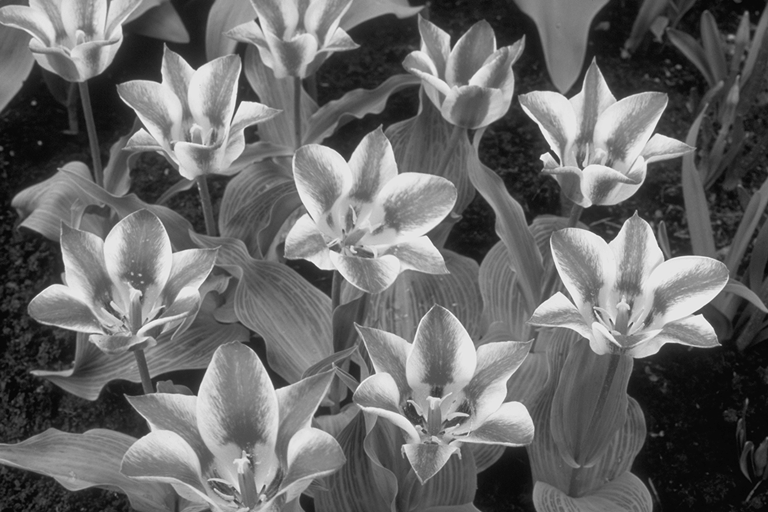

In [29]:
# Typecast to Gray{Float32} type
Grayscale_image = Gray{Float32}.(h_output)